In [44]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import numpy
import scipy.stats
%matplotlib inline

In [2]:
clicks_train = pd.read_csv('./data/clicks_train.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int}, usecols=['display_id', 'ad_id'])

 Hypothesis: Displays with 4 or 6 ads are more likely than displays with any other number of ads

In [3]:
train_grp_ad = clicks_train.groupby(clicks_train['display_id'])

In [4]:
a = clicks_train.join(train_grp_ad.size().to_frame(), on='display_id', rsuffix='_r')

In [23]:
total = len(clicks_train)

In [24]:
total

87141731

In [20]:
del(train_grp_ad)

NameError: name 'train_grp_ad' is not defined

In [11]:
a.rename(columns={0:'size'}, inplace=True)

In [ ]:
a.loc[a['size']==6, 'size'] = 'Group2'

In [17]:
a.loc[a['size']==4, 'size'] = 'Group2'

In [18]:
a.loc[a['size'] != 'Group2', 'size'] = 'Group1'

In [19]:
a.head(5)

,display_id,ad_id,size
0,1,42337,Group2
1,1,139684,Group2
2,1,144739,Group2
3,1,156824,Group2
4,1,279295,Group2


In [21]:
train_grp_ad = a.groupby(a['size'])

In [28]:
grp_sizes = train_grp_ad.size()

In [36]:
group1 = train_grp_ad.get_group('Group1')

In [37]:
group2 = train_grp_ad.get_group('Group2')

In [46]:
group1.shape

(35421513, 2)

In [47]:
group2.shape

(51720218, 2)

In [41]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = len(group2)/(len(group1)+ len(group2))
    return test_stat

In [42]:
actual = TestStatistic((group1, group2))
actual

0.5935183683693408

The null hypothesis is that there is no difference between the groups. 

In [53]:
n, m = len(group1), len(group2)
all = pd.concat([group1, group2])

In [60]:
def shuffle():
    all.iloc[np.random.permutation(len(all))]
    data = all[:n], all[n:]
    return data

In [66]:
test_stats = numpy.array([TestStatistic(shuffle()) for i in range(10)])
test_stats.shape

(10,)

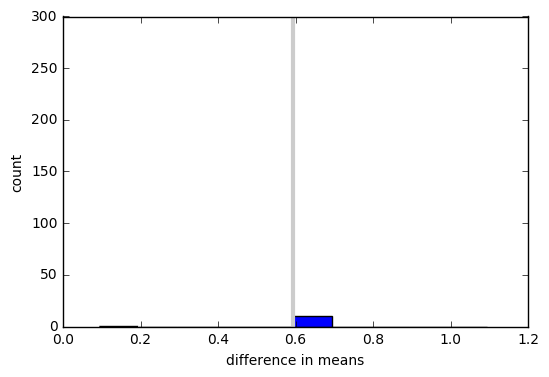

In [69]:
plt.vlines(actual, 0, 300, linewidth=3, color='0.8')
plt.hist(test_stats)
plt.xlabel('difference in means')
plt.ylabel('count')

In [70]:
pvalue = sum(test_stats >= actual) / len(test_stats)
pvalue

1.0